In [1]:
# 2 different logistic_regression will be implemented
# - a custom logistic regression, where I'll create my own cost function, gradient evaluation and descent
# - a standard logistic regression from TensorFlow

In [2]:
# Custom Logistic Regression

In [29]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

%run Dataloader.ipynb

In [30]:
mnist_dataloader = MnistDataLoader()
(X_train, y_train), (X_test, y_test) = mnist_dataloader.load_data()

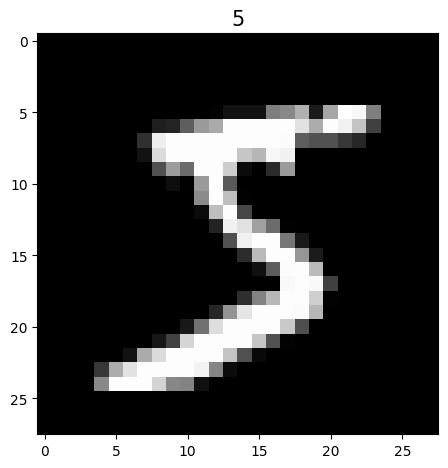

In [39]:
# example data
mnist_dataloader.show_images([X_train[0]], [y_train[0]])